In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [13]:
# Load the dataset
file_path = r"/content/Sensorless_drive_diagnosis.txt"
data = pd.read_csv(file_path, sep=' ', header=None)

# Check the shape and first few rows
print(data.shape)
data.head()


(11901, 49)


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1.0
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1.0
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1.0
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1.0
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1.0


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
dtype: int64
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    f

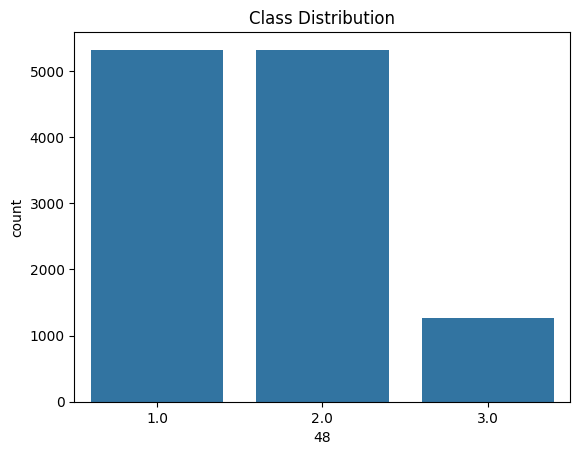

In [14]:
# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)

# Summary statistics
print(data.describe())

# Visualize the class distribution
sns.countplot(x=data.iloc[:, -1])
plt.title("Class Distribution")
plt.show()


In [15]:
X = data.iloc[:, :-1]  # All columns except last
y = data.iloc[:, -1]   # Last column is the target (motor condition)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert X and y to pandas DataFrame/Series if not already
X = pd.DataFrame(X)
y = pd.Series(y)

# Remove rows where y is NaN
mask = ~y.isna()  # True for non-NaN values
X_clean = X[mask]
y_clean = y[mask]

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.3, random_state=42, stratify=y_clean
)

print("✅ Splitting completed successfully!")



✅ Splitting completed successfully!


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 1.0


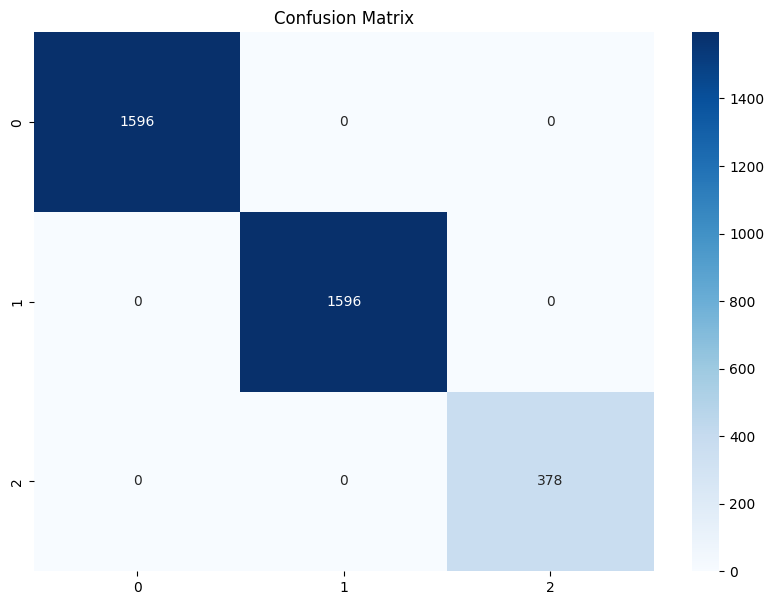

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1596
         2.0       1.00      1.00      1.00      1596
         3.0       1.00      1.00      1.00       378

    accuracy                           1.00      3570
   macro avg       1.00      1.00      1.00      3570
weighted avg       1.00      1.00      1.00      3570



In [19]:
y_pred = clf.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


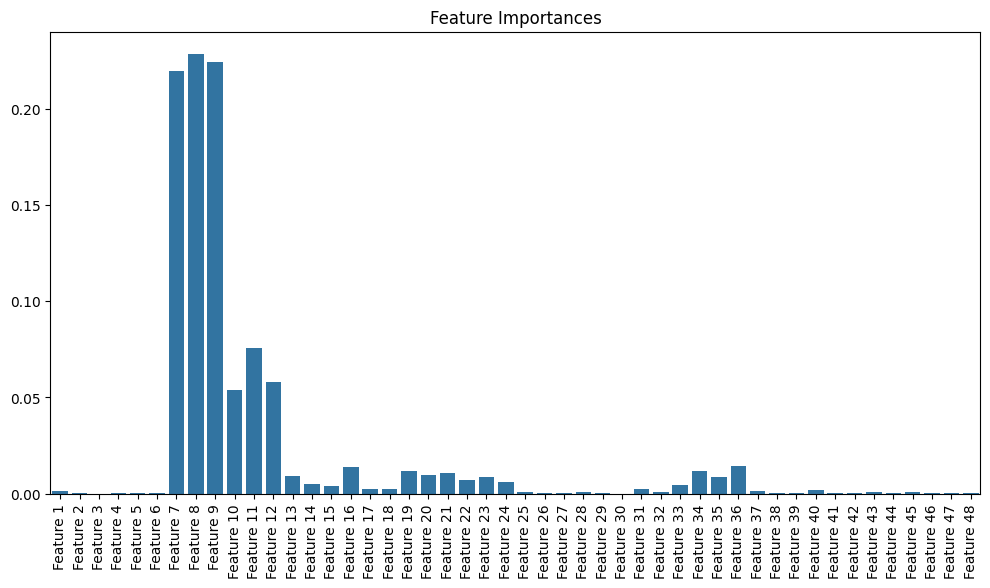

In [20]:
importances = clf.feature_importances_
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=feature_names, y=importances)
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


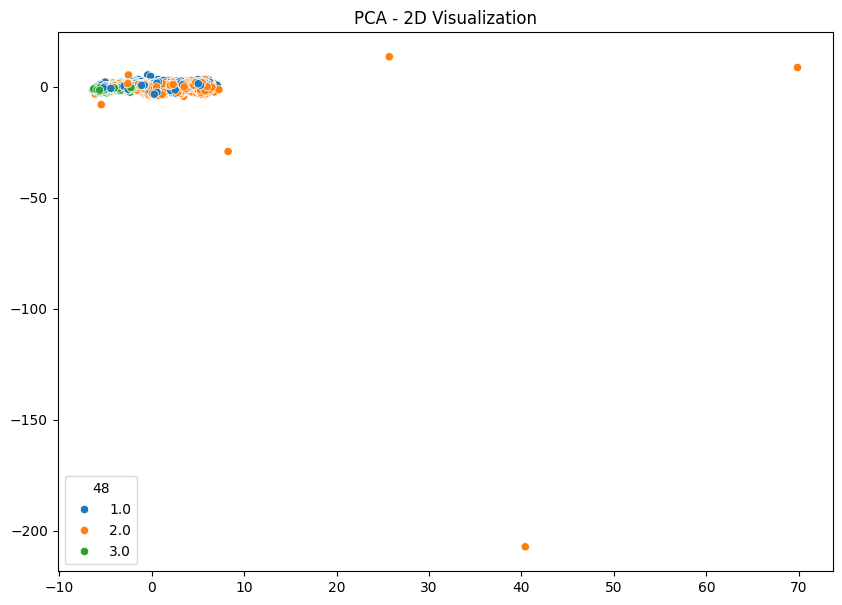

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette="tab10")
plt.title("PCA - 2D Visualization")
plt.show()


In [22]:
import joblib

# Save the model and scaler
joblib.dump(clf, 'rf_sensorless_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and Scaler saved.")


Model and Scaler saved.


In [23]:
# Load model and scaler
loaded_model = joblib.load('rf_sensorless_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Example prediction on test data
sample = X_test.iloc[0].values.reshape(1, -1)
sample_scaled = loaded_scaler.transform(sample)
prediction = loaded_model.predict(sample_scaled)
print(f"Predicted Class: {prediction[0]}")


Predicted Class: 1.0


In [24]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_model = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_model)
    print(f"{name} Accuracy: {acc:.4f}")


SVM Accuracy: 0.9989
KNN Accuracy: 0.9992
Naive Bayes Accuracy: 0.9994


In [28]:
# Prompt user
print("Enter 48 sensor values (space-separated):")

# Take input
user_input = input().split()

# Check
if len(user_input) != 48:
    print("Error: You must enter exactly 48 values!")
else:
    # Convert input to float
    user_input = np.array(user_input, dtype=float).reshape(1, -1)

    # Scale input
    user_input_scaled = scaler.transform(user_input)

    # Predict
    prediction = model.predict(user_input_scaled)

    print(f"\nPredicted Motor State Class: {prediction[0]}")

Enter 48 sensor values (space-separated):
12345678912345789012345679
Error: You must enter exactly 48 values!
